Для выполнения задачи будет использован csv файл “vgsale_1”, содержащий данные о видеоиграх, выпущенных с 1980 по 2020 гг. Каждое из наблюдений в файле имеет 10 характеристик:

Name – название игры,
Platform – игровая платформа (PC, PSP, X360 и др.),
Year – год выпуска игры,
Genre – жанр игры,
Publisher – издатель игры,
NA_Sales – продажи в Северной Америке (в миллионах),
EU_Sales – продажи в Европе (в миллионах),
JP_Sales – продажи в Японии (в миллионах),
Other_Sales – продажи в остальных странах мира (в миллионах),
Global_Sales – объем продаж по всему миру.
Загрузите файл «vgsales_1.csv» в объект DataFrame, рассчитайте необходимые показатели и визуализируйте информацию, используя функции любой библиотеки для визуализации данных. Задание:

Ответь на вопрос: игры каких жанров были наиболее популярны до 2000 года, а какие после?
Оцени популярность жанров по количеству выпущенных игр и по объему продаж по всему миру. Для визуализации полученных результатов используй столбчатые диаграммы.
Примечание. Одна и та же игра может встречаться в выборке несколько раз, т.к. она может быть выпущена на нескольких платформах.

Отобрази на графике общее число видеоигр, выпущенных в каждом году.
Определи трех издателей, выпустивших наибольшее количество видеоигр. Изобрази количество выпущенных издателями видеоигр для каждой платформы на столбчатой диаграмме (можно использовать диаграмму с накоплением).
Отобрази на круговых диаграммах доли суммарного объема продаж с 1980 г. до 2000 г. и с 2000 г. до 2020 г. в Северной Америке, Европе, Японии (также для построения корректных диаграмм используйте столбец “Other Sales”) от объема продаж по всему миру.

In [ ]:
#

!wget -O vgsale_1.csv "https://drive.google.com/uc?id=1XV9IZ8cGArgCO9VkGId_IW2fewhg_tLN"
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

df = pd.read_csv('./vgsale_1.csv')


--2024-07-15 08:05:39--  https://drive.google.com/uc?id=1XV9IZ8cGArgCO9VkGId_IW2fewhg_tLN
Resolving drive.google.com (drive.google.com)... 108.177.119.100, 108.177.119.102, 108.177.119.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1XV9IZ8cGArgCO9VkGId_IW2fewhg_tLN [following]
--2024-07-15 08:05:39--  https://drive.usercontent.google.com/download?id=1XV9IZ8cGArgCO9VkGId_IW2fewhg_tLN
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.143.132, 2a00:1450:4013:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.143.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1370032 (1.3M) [application/octet-stream]
Saving to: ‘vgsale_1.csv’

vgsale_1.csv        100%[===================>]   1.31M  --.-KB/s    in 0.008s  

2024-07-15 08:05:40 (155 MB/s

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [ ]:
for_q1 = df[['Genre', 'Global_Sales', 'Year']].sort_values('Year')
for_q1 = for_q1.drop(for_q1[for_q1['Year'].isnull()].index)
for_q1['Year'] = pd.to_numeric(for_q1['Year'], errors='coerce')
before = for_q1[['Genre', 'Global_Sales', 'Year']]
before = before.drop(before[before['Year']>2000].index)
before = before[['Genre', 'Global_Sales']]
before = before.groupby("Genre").sum().sort_values('Global_Sales', ascending=False)

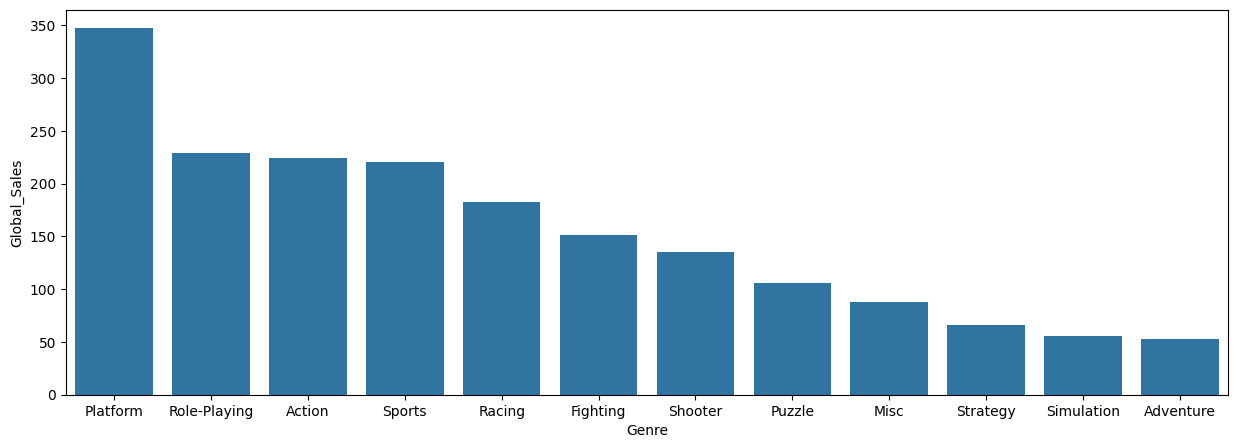

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x="Genre", y='Global_Sales', data=before)
plt.show()
# до 2000г

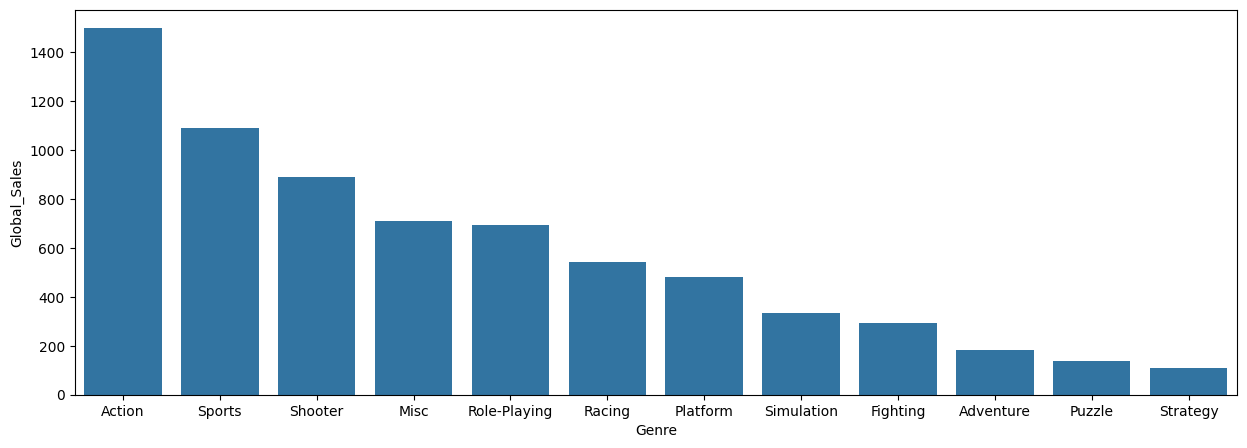

In [ ]:
above = for_q1[['Genre', 'Global_Sales', 'Year']]
above = above.drop(above[above['Year']<2001].index)
above = above[['Genre', 'Global_Sales']]
above = above.groupby("Genre").sum().sort_values('Global_Sales', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x="Genre", y='Global_Sales', data=above)
plt.show()  # после 2000г

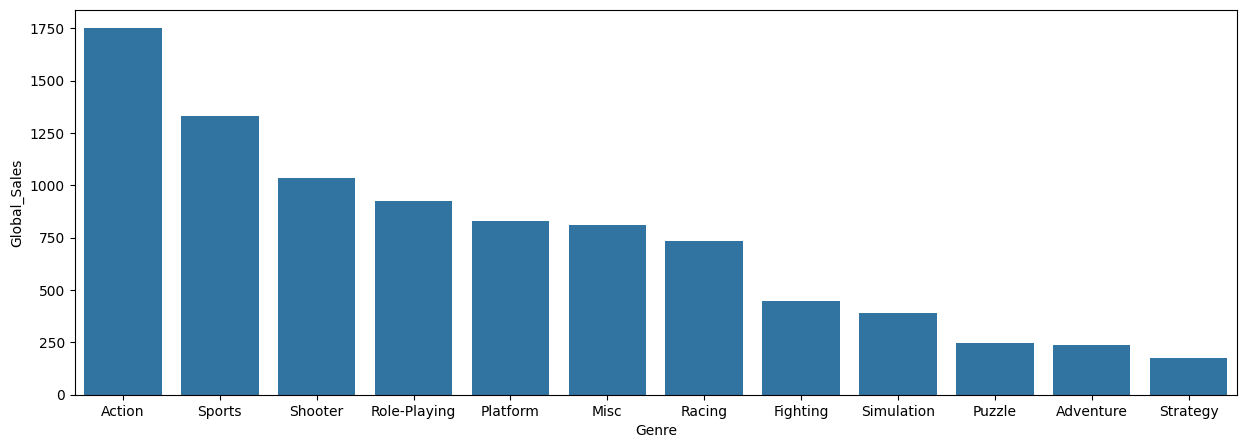

In [ ]:
#
for_q2 = df[['Genre', 'Global_Sales']]
for_q2 = for_q2[['Genre', 'Global_Sales']].groupby('Genre').sum().sort_values('Global_Sales', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x="Genre", y='Global_Sales', data=for_q2)
plt.show()  # популярность жанров относительно общих продаж

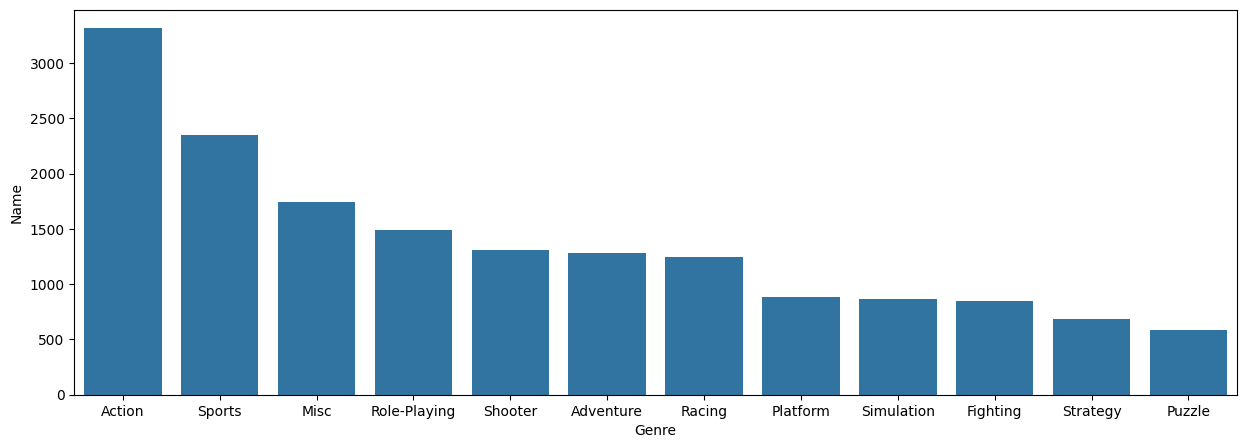

In [ ]:
for_q2 = df[['Genre', 'Name']].groupby('Genre').count().sort_values('Name', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x="Genre", y='Name', data=for_q2)
plt.show() # отношение количества выпущенных к жанрам

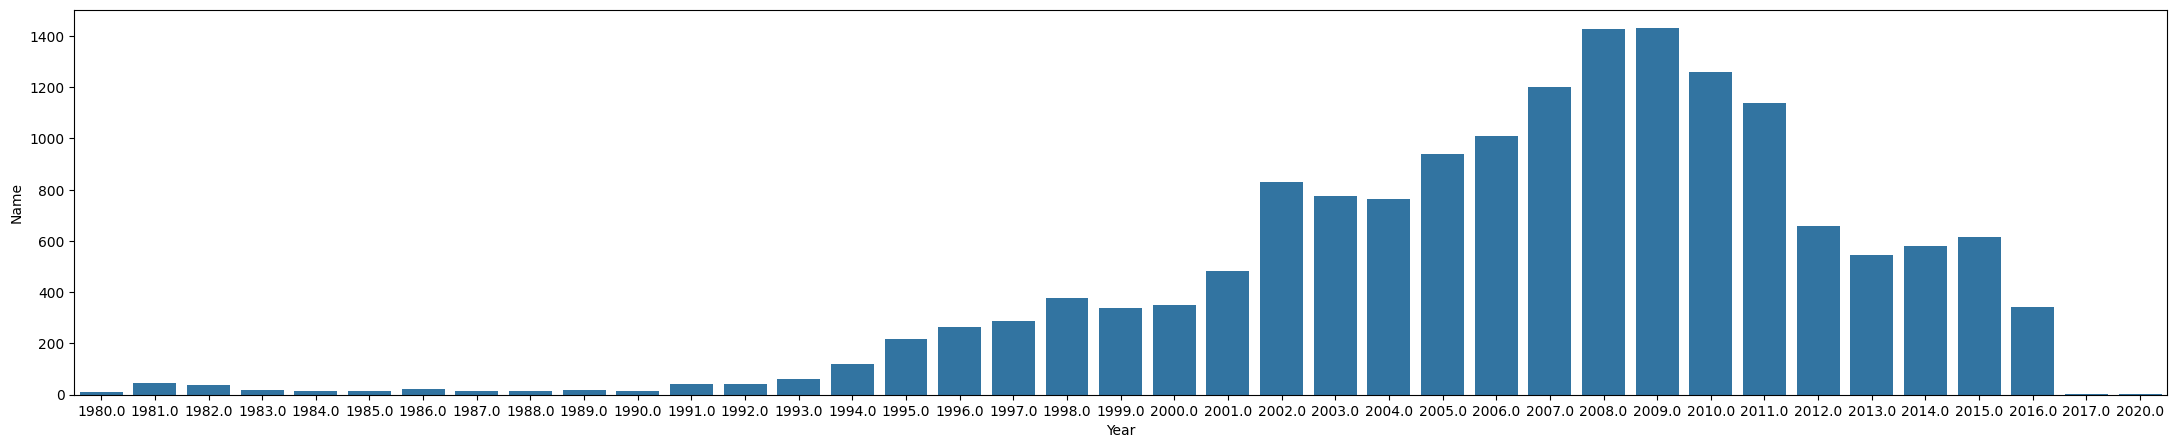

In [ ]:
for_q3 = df[['Name', 'Year']]
for_q3 = for_q3[['Name', 'Year']].groupby('Year').count().sort_values('Name', ascending=False)

plt.figure(figsize=(27,5))
sns.barplot(x="Year", y='Name', data=for_q3)
plt.show()  # число видеоигр, выпущенных в каждом году
# пробовал и так и сяк - но так и не смог убрать .0 у годов

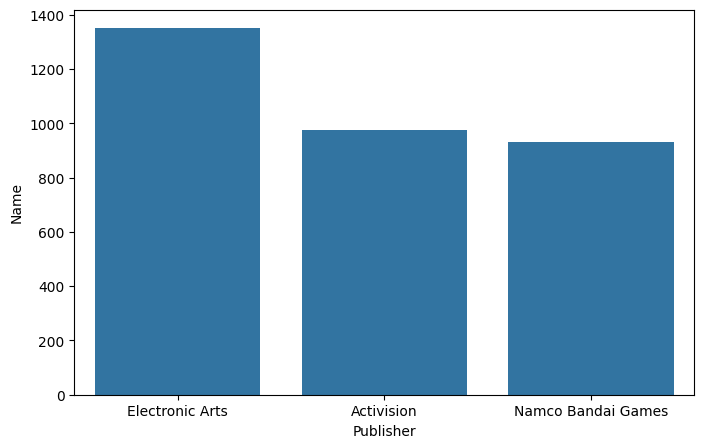

In [ ]:
for_q4 = df[['Name', 'Publisher', 'Platform']]
pub = for_q4[['Name', 'Publisher']].groupby('Publisher').count().sort_values('Name', ascending=False)[:3]

plt.figure(figsize=(8,5))
sns.barplot(y="Name", x='Publisher', data=pub)
plt.show()  # трех издателей, выпустивших наибольшее количество видеоигр

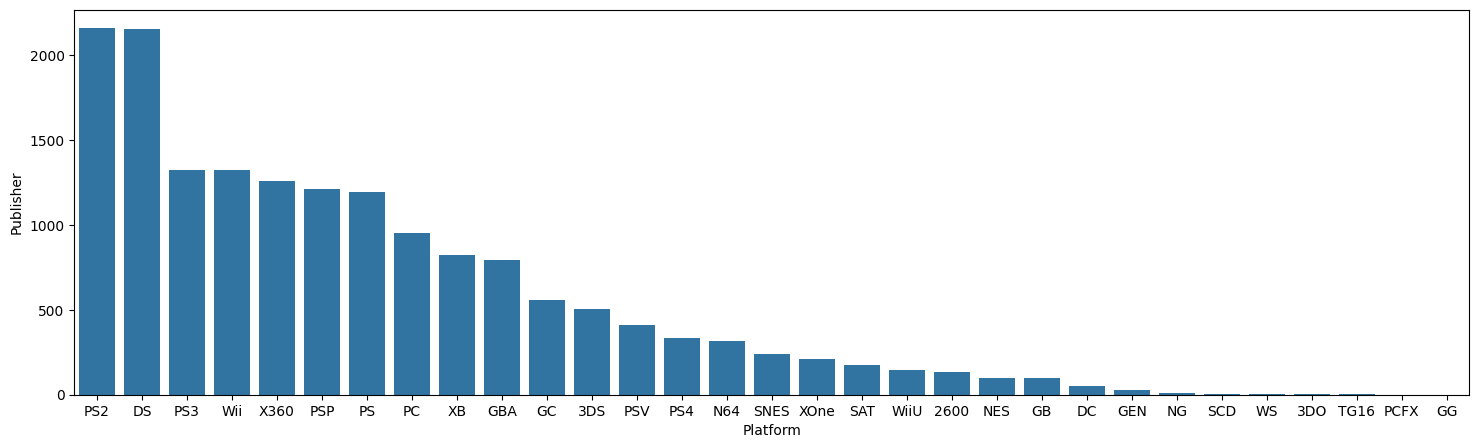

In [ ]:
pub = for_q4[['Platform', 'Publisher']].groupby('Platform').count().sort_values('Publisher', ascending=False)

plt.figure(figsize=(18,5))
sns.barplot(y="Publisher", x='Platform', data=pub)
plt.show()  # количество выпущенных издателями видеоигр для каждой платформы
# (можно использовать диаграмму с накоплением) - это которая?

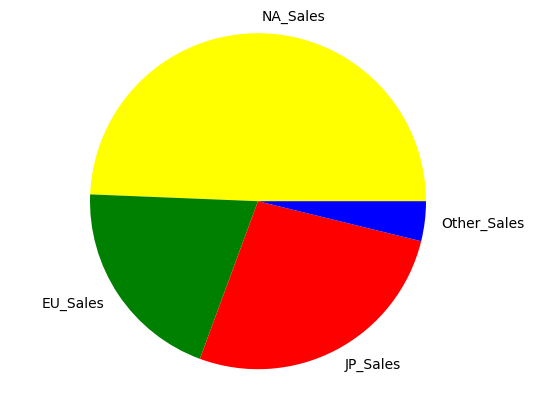

In [ ]:
#
for_q5 = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year']]
a1980_2000 = for_q5[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year']]
a1980_2000 = a1980_2000.drop(a1980_2000[a1980_2000['Year']>2000].index)
na = sum(a1980_2000['NA_Sales'])
eu = sum(a1980_2000['EU_Sales'])
jp = sum(a1980_2000['JP_Sales'])
other = sum(a1980_2000['Other_Sales'])

labels = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
values = [na, eu, jp, other]
colors = ['yellow','green','red','blue']
plt.pie(values,labels=labels,colors=colors)
plt.axis('equal')
plt.show() # с 1980 г. до 2000 г
# взято с https://pythonru.com/biblioteki/tipy-grafikov-v-matplotlib-plt3?ysclid=lyk17r3pq7695720847

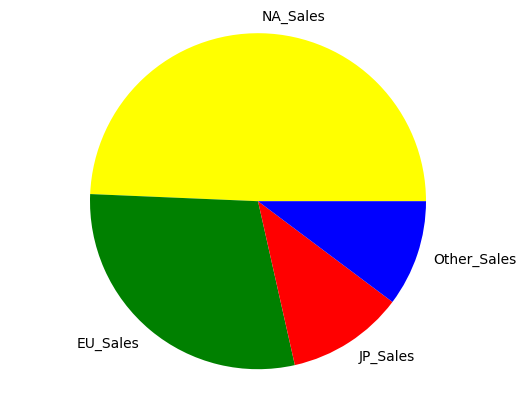

In [ ]:
a2000_2020 = for_q5[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year']]
a2000_2020 = a2000_2020.drop(a2000_2020[a2000_2020['Year']<2000].index)

na = sum(a2000_2020['NA_Sales'])
eu = sum(a2000_2020['EU_Sales'])
jp = sum(a2000_2020['JP_Sales'])
other = sum(a2000_2020['Other_Sales'])

labels = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
values = [na, eu, jp, other]
colors = ['yellow','green','red','blue']
plt.pie(values,labels=labels,colors=colors)
plt.axis('equal')
plt.show() # с 2000 г. до 2020